# Assignment 5 with Principal Components Analysis and Clustering

## I spent a signficant amount of time loading the data and found a short cut by internet searching existing url pages of MNIST data

In [37]:
%matplotlib inline

# commmon imports
import os
import pandas as pd
import numpy as np

# Visuals
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# notebook assistance
from jupyterthemes import jtplot

# IPython display
from IPython.display import display

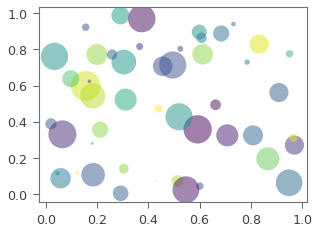

In [46]:
!jt -t grade3 -f fira -fs 115
jtplot.style(theme='monokai')

jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()



In [47]:
def santatize_set( dataframe ):
    if dataframe.isnull().values.any() == True:
        cleaned = dataframe.dropna()
        print('Dropped {} invalid samples'.format(dataframe.count - cleaned.count))
        dataframe = cleaned
    return dataframe

In [48]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [49]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [50]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

## Preparing to Model the Data

In [51]:
from scipy.io import loadmat 
import urllib.request

from six.moves import urllib

from scipy.io import loadmat
mnist_alternative_url = "https://raw.githubusercontent.com/bmoretz/MSDS-MachineLearning/master/datasets/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)

with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [52]:
X, y = mnist['data'], mnist['target']

In [53]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [54]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Random Forest Classifier will process the random attributes of the data 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)

### Default the number of trees to 100 with an equally divisible 10 relative reduction and process all at negative one n_jobs

### Performance Assessment of Random Forest

In [56]:
import time
np.random.seed(seed = 42) 

# start with an empty list for storing
x_time = [] 

# count initialization
n = 0  

In [57]:
while (n < replications): 
    start_time = time.clock()
    
    rf_clf.fit(X_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  
    x_time.append(runtime * 1000)   
    n = n + 1

NameError: name 'replications' is not defined